# Importing Libraries

In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
# loading and reading csv file

loan_df = pd.read_csv('Loan_Default_Data.csv')
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# EDA

In [4]:
# checking shape of dataset

print(loan_df.shape)

print("-------------------------------------------------------------------------------")

# checking names of columns

print(loan_df.columns)

(42542, 111)
-------------------------------------------------------------------------------
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [5]:
# checking datatypes of each column

for i in loan_df.columns:
  print(i, type(loan_df.loc[0,i]))

id <class 'int'>
member_id <class 'numpy.float64'>
loan_amnt <class 'numpy.float64'>
funded_amnt <class 'numpy.float64'>
funded_amnt_inv <class 'numpy.float64'>
term <class 'str'>
int_rate <class 'str'>
installment <class 'numpy.float64'>
grade <class 'str'>
sub_grade <class 'str'>
emp_title <class 'float'>
emp_length <class 'str'>
home_ownership <class 'str'>
annual_inc <class 'numpy.float64'>
verification_status <class 'str'>
issue_d <class 'str'>
loan_status <class 'str'>
pymnt_plan <class 'str'>
url <class 'str'>
desc <class 'str'>
purpose <class 'str'>
title <class 'str'>
zip_code <class 'str'>
addr_state <class 'str'>
dti <class 'numpy.float64'>
delinq_2yrs <class 'numpy.float64'>
earliest_cr_line <class 'str'>
inq_last_6mths <class 'numpy.float64'>
mths_since_last_delinq <class 'numpy.float64'>
mths_since_last_record <class 'numpy.float64'>
open_acc <class 'numpy.float64'>
pub_rec <class 'numpy.float64'>
revol_bal <class 'numpy.float64'>
revol_util <class 'str'>
total_acc <class

In [6]:
# checking if there are any values in the dataset

(loan_df.isnull().sum() / len(loan_df)) * 100

id                              0.009402
member_id                       0.016454
loan_amnt                       0.016454
funded_amnt                     0.016454
funded_amnt_inv                 0.016454
                                 ...    
tax_liens                       0.263269
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# selecting columns which have more than 40,000 NA values

ldf_null = loan_df.isnull().sum()>20000

print(ldf_null)

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool


In [8]:
# Removing columns which are having null value greater than 40000

col_to_rem = []
for row_val in ldf_null.index:
    if ldf_null[row_val] == True:
        col_to_rem.append(row_val)
        
print(col_to_rem)

# (OR) col_to_rem = list(ldf_null[ldf_null.values==True].index)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [9]:
loan_df = loan_df.drop(col_to_rem, axis=1)
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Dec-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Oct-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Dec-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [10]:
loan_df.shape

(42542, 54)

# Wordcloud for Reasons to take up Loan

In [11]:
df_desc = loan_df[loan_df['desc'].notnull()]

In [12]:
for cat in df_desc['desc']:
    print(cat)

  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>
  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>
  Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills

Legal assistance Borrower added on 12/06/11 > For legal assistance<br><br> Borrower added on 12/06/11 > legal assistance<br>
  Borrower added on 12/06/11 > I am plan on using the loan to pay off 2 credit cards that I have. My credit sore shows that i am a responsible borrower and pay all debts on time.<br>
  Borrower added on 12/06/11 > Thank you for lending me this money It will help very much.<br><br> Borrower added on 12/06/11 > To consolidate and pay down some bills. <br><br> Borrower added on 12/06/11 > To pay off a credit card.<br><br> Borrower added on 12/06/11 > To pay off chase bank.<br><br> Borrower added on 12/06/11 > Thank you!<br><br> Borrower added on 12/06/11 > To pay off my high interest credit card.<br><br> Borrower added on 12/06/11 > to pay off my credit card <br>
  Borrower added on 12/06/11 > Looking to simplify some credit card debt and concentrate on paying it off with a more reasonable interest rate. Recently moved for a new job opportunity in the technology fie

  Borrower added on 11/24/11 > I want consolidate credit cards to one payment and a lower interest rate.  I have never missed a credit payment.<br> Borrower added on 11/27/11 > I have been working at the same employer for over two years and recently moved into a stable promotion.<br>
  Borrower added on 11/27/11 > I work in the Steel Construction Industry.  Have been doing it for 18 years straight. Just tired of working for other people and would like to run my own business. Need money to buy the software and computers.<br>
  Borrower added on 11/24/11 > I will be paying off some loans.  I have never been late on a payment.  I have been at my job for over 10 years and was at my previous job for over 10 years.<br>
  Borrower added on 12/01/11 > I plan to use the loan for the purpose of debt consolidation. I am a good borrower due to the fact that I have not defaulted on any loan or credit and am a current home owner. <br>
  Borrower added on 11/24/11 > loan is for to cosolidate other cr

  Borrower added on 11/01/11 > Refinance Higher Credit Card Balances to save interest charges.<br/>
  Borrower added on 11/01/11 > This loan will be used for home improvement.  I have been employed with the State of Alabama for 18 years.<br/>
  Borrower added on 11/01/11 > It probably should be listed as home improvement. My backyard is being redone. I plan to add a deck, landscaping, and a new fence.<br/>You can see that I am a good borrower from my history of paying all my bills on-time. I have always been responsible paying anything I owe in a responsible, timely manner.<br/><br/>I am an educator in a good position, so my job is very stable.<br/>&nbsp;<br/>
  Borrower added on 11/01/11 > The proceeds of this loan will be used to pay-off high interest credit cards.  Since the term of this loan is set at 3-years, I'll be able to save a substantial amount of money which will be reinvested.<br/>
  Borrower added on 11/01/11 > pls make the funds faster<br/> Borrower added on 11/02/11 > P

  Borrower added on 10/19/11 > We are never late on our credit card payments, but we are just able to pay the minimum payment, with no end in site. This loan would really help us feel there is a light at the end up the tunnel with our credit card debt. Please help us.<br/>
  Borrower added on 10/18/11 > I plan to consolidate all my personal debts. My goal is to be paid off in full in 5 yrs. or less and have no credit card debt. I have a secure job with future advancement possibilities.<br/>
  Borrower added on 10/19/11 > I am using the loan to consolidate all of my credit cards. The loan covers all of my current depit so the monthly card payments will go directly to the loan. I have not been late of a credit card payment and have a very stable job.<br/>
  Borrower added on 10/18/11 > We're finishing our basement with new cabinets, sinks, stone flooring, baseboards, wood trim, and window blinds.<br/>
  Borrower added on 10/18/11 > need to pay for merchandizing of my new book<br/>need fo

  Borrower added on 10/06/11 > I plan to payoff a high interest loan..My job is very stable at the post office with 16 years emplyment and my mortgage and credit card payments have been on time for al least the past 30 months<br/>
  Borrower added on 10/07/11 > Small Business Equipment Purchase<br/>
  Borrower added on 10/11/11 > A loan to pay off credit card debt.<br/>
  Borrower added on 10/06/11 > I am intent on succeeding in life but just need a little help.  I have been employed with same company for 11 years.  Pay all debts on time.<br/>
  Borrower added on 10/06/11 > Short term cash flow loan.<br/> Borrower added on 10/07/11 > Will pay off loan in December/January upon receipt of earned commissions<br/>
  Borrower added on 10/06/11 > I am planing to pay out all my credit cards with this loan.<br/><br/>I always pay my bills on time.<br/><br/>my monthly budget is over $1,000.<br/><br/>my job is very stable, i am working there over 6 years.<br/>
  Borrower added on 10/06/11 > pay c

  Borrower added on 09/09/11 > I will use the loan to pay off credit debt that is at a higher rate than what is mentioned above.My plan is to have all debt paid off within three years except for our home. I am very conscientious with regard to paying off debt in a timely manner and have a credit score in the excellent range.<br/> Borrower added on 09/09/11 > Iam old school so I thank you for the consideration.<br/>null
  Borrower added on 09/07/11 > We are ready to proceed with the loan.<br/> Borrower added on 09/09/11 > This loan will be used to remodel my bathroom.<br/> Borrower added on 09/15/11 > I am looking forward to the loan funding and initiating the remodel of my bathroom.<br/>null
  Borrower added on 09/06/11 > I have some higher interest rate credit cards that i would like to pay off as well as an existing loan i have from this site. I have always made my payments on time and i have excellant credit.<br/> Borrower added on 09/07/11 > I am willing to answer any questions or 

  Borrower added on 09/06/11 > Credit Card Consolidation<br/>null
  Borrower added on 09/01/11 > Thank you<br/>
  Borrower added on 09/03/11 > My debt consolidation loan will be used to pay off my two credit cards.  My chase card has increased their interest rate for no reason. This makes it almost impossible to pay off with the high interest and processing fees.  My other card does have a way better interest rate but I feel it will be easier to combine them both so I can pay them off within a more reasonable time period.  With the consolidation loan the payments will be the same as I pay on the cards monthly and it will allow me to actually pay them off.  I was going to use the remaining balance to finish my basement which includes new flooring, paint, and trim.<br/>
  Borrower added on 09/03/11 > Employed as a licensed professional at same company for 7 years next month. Have good credit score of 715. Plan to use funds to purchase a 1999 Honda Valkyrie Interstate. The vehicle has a K

  Borrower added on 08/10/11 > Dear Potential Investors, I ask for this loan to consolidate debt. I am at a senior level of management with a company I have worked for for over 10 years. I am a very stable borrower &amp; have never been late on a monthly payment. I have a very stable job in a company that continues to flourish despite the economy. This loan will just allow me to consolidate my debt into one place. Thank you for your consideration.<br/> Borrower added on 08/10/11 > Please note that I have an American Express Platinum card that is under my name, carries a high balance, but is used for work purposes - it is required to be paid off every month. As a part of my job, I travel and pay for many different trade shows, etc and it requires a high revolving balance.<br/> Borrower added on 08/10/11 > The American Express is paid for by my company, just to be clear.<br/>
  Borrower added on 08/09/11 > I would like to pay off all my credit card debt. I always make payment on time as 

  Borrower added on 07/07/11 > Looking to pay some credit cards down and get some extra cash.<br/>
  Borrower added on 07/07/11 > I have a personal loan with a 21.99% that I pay $404 a month. I'm just looking to lower APR and monthly payment.<br/> Borrower added on 07/08/11 > Thanks to the investors thus far...<br/> Borrower added on 07/11/11 > Please let me know if you have questions for me...thanks again to all the amazing investors.  Its going to save me so much interest &amp; money a month.<br/>
  Borrower added on 07/07/11 > We are a pet treat manufacturer located sunny Florida. For the last 6 months we've been starting up our business and have now found ourselves in a windfall of large orders. Our buyers are large North American chains such as Homegoods, Winners, TJMaxx, Ross Stores and private label production. We're averaging 32% profit currently and our orders have increased at 200+% for the last 4 months. Currently I work full time a a large US bank while getting this company

  Borrower added on 06/25/11 > For help purchasing a used vehicle from a private seller. Using the Lending Club because they are offering a better APR than dealerships. I would have no problem making this monthly payment of $90.<br/> Borrower added on 06/25/11 > I work for a major university and my job is very secure. I have had several vehicle loans in the past and have never had so much as one late payment.<br/>
  Borrower added on 06/24/11 > Loan will be used to do some home improvement and to consolidate debt. Job is very stable with a rapidly growing company.<br/>
  Borrower added on 06/24/11 > June 2011<br/>
  Borrower added on 06/24/11 > Personal loan<br/> Borrower added on 06/24/11 > need the extra funds to payback some loans<br/>
  Borrower added on 06/27/11 > I have never been late on a payment. Always have excellent credit and will always pay my bills on time. I have been at my job for over 10 years and will be promoted again by the end of this year. I am a very responsible 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
L = []
for cat in df_desc['desc'].head(100):
    catt = cat.split()
    L = L + catt[5:-1] + [catt[-1].split('.')[0]]
print(L)

['I', 'need', 'to', 'upgrade', 'my', 'business', 'technologies', 'I', 'plan', 'to', 'use', 'this', 'money', 'to', 'finance', 'the', 'motorcycle', 'i', 'am', 'looking', 'at.', 'I', 'plan', 'to', 'have', 'it', 'paid', 'off', 'as', 'soon', 'as', 'possible/when', 'i', 'sell', 'my', 'old', 'bike.', 'I', 'only', 'need', 'this', 'money', 'because', 'the', 'deal', 'im', 'looking', 'at', 'is', 'to', 'good', 'to', 'pass', 'up.<br><br>', 'Borrower', 'added', 'on', '12/22/11', '>', 'I', 'plan', 'to', 'use', 'this', 'money', 'to', 'finance', 'the', 'motorcycle', 'i', 'am', 'looking', 'at.', 'I', 'plan', 'to', 'have', 'it', 'paid', 'off', 'as', 'soon', 'as', 'possible/when', 'i', 'sell', 'my', 'old', 'bike.I', 'only', 'need', 'this', 'money', 'because', 'the', 'deal', 'im', 'looking', 'at', 'is', 'to', 'good', 'to', 'pass', 'up.', 'I', 'have', 'finished', 'college', 'with', 'an', 'associates', 'degree', 'in', 'business', 'and', 'its', 'takingmeplaces<br>', 'to', 'pay', 'for', 'property', 'tax', '(bo

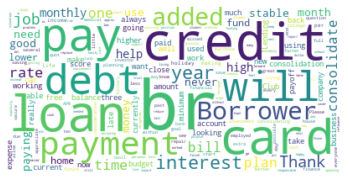

In [14]:
# wordcloud for 'desc' column - gives an idea about the reason of taking loan for highest no of frequencies

from wordcloud import WordCloud

L = []
for cat in df_desc['desc'].head(400):
    catt = cat.split()
    L = L + catt[5:-1] + [catt[-1].split('.')[0]]

text = " ".join(L)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Feature Selection

In [15]:
loan_df.drop_duplicates(inplace=True)
loan_df = loan_df.drop(['desc', 'url'],axis=1)

In [16]:
loan_df.shape

(42539, 52)

In [17]:
# percentage of missing data

(loan_df.isnull().sum() / loan_df.shape[0]) * 100

id                            0.002351
member_id                     0.009403
loan_amnt                     0.009403
funded_amnt                   0.009403
funded_amnt_inv               0.009403
term                          0.009403
int_rate                      0.009403
installment                   0.009403
grade                         0.009403
sub_grade                     0.009403
emp_title                     6.182562
emp_length                    2.623475
home_ownership                0.009403
annual_inc                    0.018806
verification_status           0.009403
issue_d                       0.009403
loan_status                   0.009403
pymnt_plan                    0.009403
purpose                       0.009403
title                         0.039963
zip_code                      0.009403
addr_state                    0.009403
dti                           0.009403
delinq_2yrs                   0.077576
earliest_cr_line              0.077576
inq_last_6mths           

In [18]:
loan_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,...,100.941580,14.015331,2613.319951,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,...,719.952213,159.867286,4385.024372,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,...,0.000000,0.000000,211.270000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,...,0.000000,0.000000,528.610000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,...,0.000000,0.000000,3170.220000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


In [19]:
loan_df.isna().sum()

id                               1
member_id                        4
loan_amnt                        4
funded_amnt                      4
funded_amnt_inv                  4
term                             4
int_rate                         4
installment                      4
grade                            4
sub_grade                        4
emp_title                     2630
emp_length                    1116
home_ownership                   4
annual_inc                       8
verification_status              4
issue_d                          4
loan_status                      4
pymnt_plan                       4
purpose                          4
title                           17
zip_code                         4
addr_state                       4
dti                              4
delinq_2yrs                     33
earliest_cr_line                33
inq_last_6mths                  33
open_acc                        33
pub_rec                         33
revol_bal           

In [20]:
loan_df['emp_title'].value_counts()[0:10]

US Army              139
Bank of America      115
IBM                   72
AT&T                  61
Kaiser Permanente     61
UPS                   58
Wells Fargo           57
USAF                  56
US Air Force          55
Self Employed         49
Name: emp_title, dtype: int64

# Bar Graph to understand Employee titles who applied for loan 

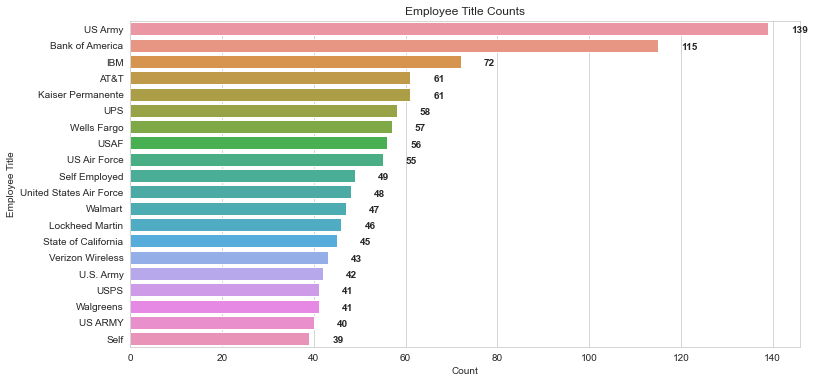

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Extract the top 20 employee titles and their counts
title_counts = loan_df['emp_title'].value_counts()[0:20]

# Create a horizontal bar plot with Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
bar_plot = sns.barplot(x=title_counts, y=title_counts.index, ax=ax)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Employee Title')
ax.set_title('Employee Title Counts')

# Add values on the bar plot
for i, v in enumerate(title_counts):
    ax.text(v+5, i+.25, str(v), fontweight='bold', fontsize=10)

# Display the plot
plt.show()

# To undestand the percentage of people who paid the loan based on employment length

Some of the pre-processing steps are performed here although the explanation on how it was done will be provided below

In [22]:
# encoding the emp_length column with dummy variables

dicti = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }
}

loan_df = loan_df.replace(dicti)

# Encoding the 'Fully Paid' as 1 and the rest of the labels as 0

In [23]:
loan_df['loan_status'].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

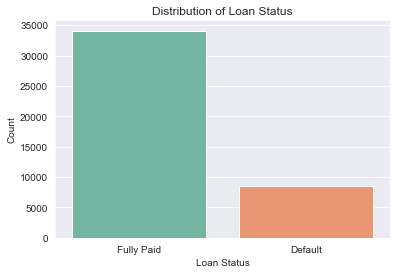

In [24]:
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 'Fully Paid' if x=='Fully Paid' else 'Default')
loan_df['loan_status'] = loan_df['loan_status'].map(lambda x: 'Fully Paid' if x == 'Fully Paid' else 'Default')

sns.set_style('darkgrid')
sns.countplot(x='loan_status', data=loan_df, palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

In [25]:
status_replace = {"loan_status" : {"Fully Paid": 1, "Default": 0}}
loan_df = loan_df.replace(status_replace)

loan_df['loan_status'].value_counts()

1    34085
0     8454
Name: loan_status, dtype: int64

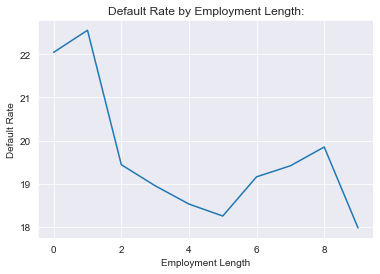

In [26]:
import seaborn as sns

# group the data by 'emp_length' and count the occurrence of each label
counts = loan_df.groupby('emp_length')['loan_status'].value_counts()

# calculate the percentage of 'Charged Off' label for each group
charged_off_pct = counts.loc[:, 0] / counts.sum(level=0) * 100

# We won't consider 10+ years since it is cummulative of all the years after 10 years of employment
charged_off_pct = charged_off_pct.head(10)

# create a dataframe from the result
df = pd.DataFrame({'Employment Length': charged_off_pct.index, 'Default Rate': charged_off_pct.values})

# create the line plot using seaborn
sns.lineplot(x='Employment Length', y='Default Rate', data=df)

# set the x-label
plt.xlabel('Employment Length')

# set the y-label
plt.ylabel('Default Rate')

# set the title
plt.title('Default Rate by Employment Length:')

# show the plot
plt.show()

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

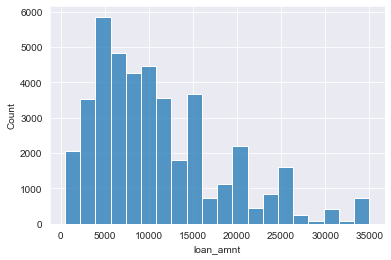

In [27]:
import seaborn as sns

sns.histplot(data=loan_df, x='loan_amnt', bins=20, kde=False)

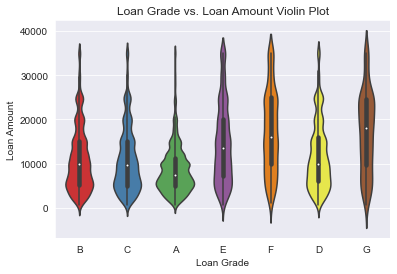

In [28]:
import seaborn as sns

# create a violin plot of loan grade split by loan amount
sns.violinplot(x='grade', y='loan_amnt', data=loan_df, palette='Set1')

# set the x-label
plt.xlabel('Loan Grade')

# set the y-label
plt.ylabel('Loan Amount')

# set the title
plt.title('Loan Grade vs. Loan Amount Violin Plot')

# show the plot
plt.show()

# TARGET COLUMN - LOAN STATUS (one hot encoding)

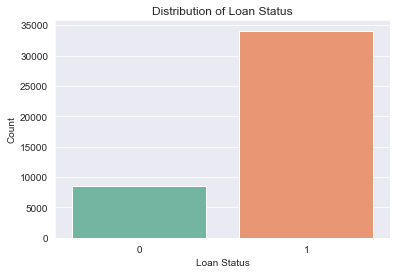

In [29]:
sns.set_style('darkgrid')
sns.countplot(x='loan_status', data=loan_df, palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

### We could see that compared to "Fully Paid" and " Charged Off", other values of "Loan Status" column have very less data. Therefore for further analysis, we have combined other target  values into one in our dataset.

In [30]:
# dropping columns with single value charachter (they are of no use for further analysis, as can be seen from MS-Excel sheet)

orig_columns = loan_df.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_df[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan_df = loan_df.drop(drop_columns, axis = 1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths']

In [31]:
loan_df.shape

(42539, 46)

In [32]:
# make a wordcloud from description column

In [33]:
loan_df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
member_id,1.000000,0.156461,0.165351,0.299733,0.088503,0.135320,0.010164,0.155042,0.079503,-0.025287,...,0.146202,0.183833,-0.072011,0.021438,-0.022765,0.137055,-0.024595,-0.012485,-0.020679,-0.012505
loan_amnt,0.156461,1.000000,0.981746,0.929598,0.930869,0.158339,0.276122,-0.004434,0.065112,-0.032767,...,0.850873,0.729120,0.043387,0.131999,0.070731,0.447741,-0.005777,-0.003974,-0.037557,-0.005963
funded_amnt,0.165351,0.981746,1.000000,0.947525,0.956522,0.157903,0.272067,-0.001864,0.064821,-0.033421,...,0.868774,0.736400,0.045778,0.132907,0.072710,0.452298,-0.005627,-0.003938,-0.038855,-0.006001
funded_amnt_inv,0.299733,0.929598,0.947525,1.000000,0.890148,0.173097,0.252338,0.050812,0.071086,-0.043863,...,0.841549,0.726563,0.020036,0.115115,0.054143,0.441548,-0.012589,-0.006200,-0.046120,-0.006242
installment,0.088503,0.930869,0.956522,0.890148,1.000000,0.128330,0.278339,0.000186,0.054948,-0.020096,...,0.843369,0.633625,0.057249,0.117198,0.074712,0.400190,-0.004109,-0.003495,-0.033746,-0.005929
emp_length,0.135320,0.158339,0.157903,0.173097,0.128330,1.000000,0.115990,0.018189,0.058428,0.012322,...,0.134205,0.127858,-0.020689,0.025207,0.006264,0.078992,-0.000483,-0.004048,0.060733,0.002856
annual_inc,0.010164,0.276122,0.272067,0.252338,0.278339,0.115990,1.000000,0.028715,-0.116559,0.022161,...,0.259530,0.187837,0.009759,0.024073,0.015990,0.139397,-0.000926,-0.001809,-0.015437,-0.001828
loan_status,0.155042,-0.004434,-0.001864,0.050812,0.000186,0.018189,0.028715,1.000000,-0.051571,-0.039307,...,0.322114,0.028621,-0.159217,-0.281595,-0.176077,0.210331,-0.019518,-0.009802,-0.059009,-0.009784
dti,0.079503,0.065112,0.064821,0.071086,0.054948,0.058428,-0.116559,-0.051571,1.000000,-0.036577,...,0.041411,0.104544,-0.011032,0.022040,0.007852,0.003731,-0.013132,-0.009262,0.008671,-0.003346
delinq_2yrs,-0.025287,-0.032767,-0.033421,-0.043863,-0.020096,0.012322,0.022161,-0.039307,-0.036577,1.000000,...,-0.039005,0.020131,0.034595,0.012907,0.014247,-0.013928,0.072845,0.121651,0.004708,-0.001452


In [34]:
import numpy as np

# Create correlation matrix
corr_matrix = loan_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(to_drop)

# Drop features 
loan_df.drop(to_drop, axis=1, inplace=True)

['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']


In [35]:
loan_df.head()

,id,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,36 months,10.65%,B,B2,NaN,10.0,RENT,...,0.00,0.0,0.00,Jan-15,171.62,Dec-16,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,60 months,15.27%,C,C4,Ryder,0.0,RENT,...,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,36 months,15.96%,C,C5,NaN,10.0,RENT,...,0.00,0.0,0.00,Jun-14,649.91,Dec-16,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10.0,RENT,...,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,60 months,12.69%,B,B5,University Medical Group,1.0,RENT,...,0.00,0.0,0.00,Dec-16,67.79,Dec-16,0.0,0.0,0.0,0.0


In [36]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

# Deleting unncessary features from the dataset

Any future values need to be removed since we can't know that in advance before lending out the loan such as: 'recoveries' which tells us about the post charge off gross recovery. So we will be removing those columns from our dataset.

+ 'id', 'member_id' does not give us any information about the person taking out loan.
+ 'funded_amnt_inv': already removed since it had more than 85% correlation
+ 'grade', 'sub_grade'
+ 'issue_d'
+ 'zip_code': won't be needed since we already have that info in 'addr_state'.
+ 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp': these 5 variables are all about the future, they inform us about how the repayment is going. So, we need to remove them from our model.
+ 'total_rec_int' is about the interest received to date (meaning the loan has been approved) and 'total_rec_late_fee' is about the interest that are late. These 2 variables need to be removed from the dataset as these data can be confirmed via 'loan_status' column
+ 'recoveries', 'collection_recovery_fee'
+ last_pymnt_d', 'last_pymnt_amnt'

In [37]:
loan_df.drop(['id', 'member_id', 'grade', 'sub_grade', 'issue_d', 'zip_code', 'last_pymnt_d', 'last_pymnt_amnt', 'out_prncp', 'recoveries', 'total_rec_int', 'total_rec_late_fee'], axis=1, inplace=True)

In [38]:
### Do it after feature selection is over

loan_df = loan_df.dropna(axis=0)
loan_df.shape

(38506, 27)

In [39]:
loan_df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                      0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
collection_recovery_fee    0
last_credit_pull_d         0
acc_now_delinq             0
delinq_amnt                0
pub_rec_bankruptcies       0
tax_liens                  0
dtype: int64

# After cleaning checking for any correlation between Loan Features and Loan Deafult

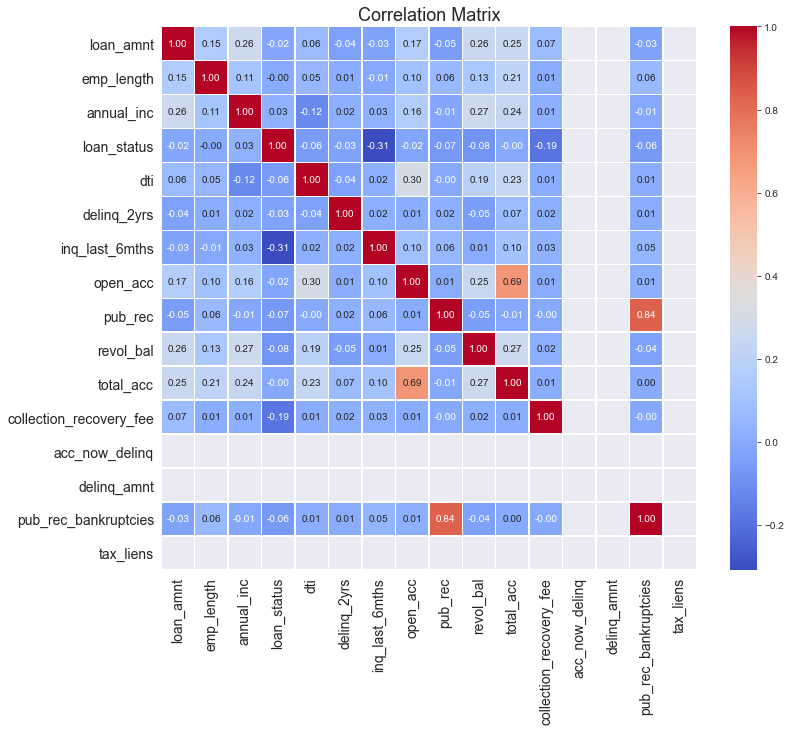

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = loan_df.corr()

# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt= '.2f', ax=ax)

# Set title
ax.set_title('Correlation Matrix', fontsize=18)

# Increase tick label size
plt.tick_params(axis='both', labelsize=14)

# Show plot
plt.show()

# Preparing the data for Modelling

In [41]:
# understanding the dtype of the features since we need to convert every column's dtype into numeric before moving onto modelling

loan_df.dtypes

loan_amnt                  float64
term                        object
int_rate                    object
emp_title                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
loan_status                  int64
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                float64
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                  object
total_acc                  float64
collection_recovery_fee    float64
last_credit_pull_d          object
acc_now_delinq             float64
delinq_amnt                float64
pub_rec_bankruptcies       float64
tax_liens                  float64
dtype: object

In [42]:
loan_df.select_dtypes(include=['object']).iloc[0]

term                         60 months
int_rate                        15.27%
emp_title                        Ryder
home_ownership                    RENT
verification_status    Source Verified
purpose                            car
title                             bike
addr_state                          GA
earliest_cr_line                Apr-99
revol_util                       9.40%
last_credit_pull_d              Oct-16
Name: 1, dtype: object

### So now we know which columns have to be converted to numerical

+ term: It is either 36 or 60 months
+ int_rate: We have to remove trailing % sign and convert it back to numerical value
+ emp_length: Needs to be converted into numeric by changing the labels
+ purpose and title convey the same thing, so we will keep only purpose since it has lesser number of labels and wil help us build a better model
+ home_ownership: They can be of 4 types: RENT, MORTAGAGE, OWN, OTHER
+ verification_status: Again these have 3 lables associated with it
+ revol_util: Need to rmeove the trailing % sign, otherwise no change 


In [43]:
loan_df['term'].value_counts()

 36 months    28077
 60 months    10429
Name: term, dtype: int64

In [44]:
loan_df['int_rate'].value_counts()

10.99%    914
13.49%    792
11.49%    784
7.51%     732
7.88%     686
         ... 
9.83%       1
17.44%      1
13.62%      1
15.83%      1
21.48%      1
Name: int_rate, Length: 360, dtype: int64

In [45]:
loan_df["int_rate"] = loan_df["int_rate"].str.rstrip("%").astype("float")

In [46]:
loan_df['emp_length'].value_counts()

10.0    8811
2.0     4455
0.0     4313
3.0     4126
4.0     3466
5.0     3278
1.0     3260
6.0     2235
7.0     1780
8.0     1507
9.0     1275
Name: emp_length, dtype: int64

In [47]:
# encoding the emp_length column with dummy variables

dicti = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }
}

loan_df = loan_df.replace(dicti)

In [48]:
loan_df['home_ownership'].value_counts()

RENT        18342
MORTGAGE    17327
OWN          2707
OTHER         130
Name: home_ownership, dtype: int64

In [49]:
loan_df['verification_status'].value_counts()

Not Verified       16169
Verified           12568
Source Verified     9769
Name: verification_status, dtype: int64

In [50]:
loan_df['revol_util'].value_counts()

0%        902
70.40%     59
66.60%     59
0.20%      59
40.70%     59
         ... 
36.78%      1
0.46%       1
0.05%       1
46.74%      1
0.16%       1
Name: revol_util, Length: 1096, dtype: int64

In [51]:
loan_df["revol_util"] = loan_df["revol_util"].str.rstrip("%").astype("float")

In [52]:
loan_df = loan_df.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)

#### Now for the rest of the columns we will directly encode them using dummy variables function

In [53]:
columns_to_be_encoded = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]

dummy_df = pd.get_dummies(loan_df[columns_to_be_encoded])

loan_df = pd.concat([loan_df, dummy_df], axis=1)
loan_df = loan_df.drop(columns_to_be_encoded, axis=1)

In [54]:
loan_df

,loan_amnt,int_rate,emp_title,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
1,2500.0,15.27,Ryder,30000.0,0,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,10000.0,13.49,AIR RESOURCES BOARD,49200.0,1,20.00,0.0,1.0,10.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,3000.0,12.69,University Medical Group,80000.0,0,17.94,0.0,0.0,15.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5,5000.0,7.90,Veolia Transportaton,36000.0,1,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,1,1,0
6,7000.0,15.96,Southern Star Photography,47004.0,1,23.51,0.0,1.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42373,20425.0,15.96,cape coral hospital,29000.0,0,11.42,0.0,8.0,10.0,1.0,...,0,0,0,0,0,0,0,0,1,0
42388,4400.0,17.86,HIGHWOODS PROPERTIES,125000.0,0,25.77,1.0,0.0,18.0,1.0,...,0,0,0,0,0,0,0,0,1,0
42456,5700.0,13.43,"PEER Center, Inc.",65000.0,0,18.22,0.0,3.0,15.0,1.0,...,0,0,0,0,0,0,0,0,1,0
42468,6000.0,12.80,Securitas Security Services,57000.0,0,15.20,2.0,4.0,13.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
loan_df = loan_df.drop(['emp_title'], axis=1)

In [56]:
loan_df.dtypes

loan_amnt                              float64
int_rate                               float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
collection_recovery_fee                float64
acc_now_delinq                         float64
delinq_amnt                            float64
pub_rec_bankruptcies                   float64
tax_liens                              float64
home_ownership_MORTGAGE                  uint8
home_ownership_OTHER                     uint8
home_ownership_OWN                       uint8
home_ownership_RENT                      uint8
verification_

# Saving the pre-processed Excel File into a new Excel File named 'NEW_LOAN_DATA'

In [65]:
loan_df.to_csv('NEW_LOAN_DATA.csv', index=False)

In [66]:
df = pd.read_csv('NEW_LOAN_DATA.csv')
df

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,2500.0,15.27,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,1
1,10000.0,13.49,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,1,0,0,0,0,1,0
2,3000.0,12.69,80000.0,0,17.94,0.0,0.0,15.0,0.0,27783.0,...,0,0,0,1,0,0,0,0,0,1
3,5000.0,7.90,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,1,1,0
4,7000.0,15.96,47004.0,1,23.51,0.0,1.0,7.0,0.0,17726.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38501,20425.0,15.96,29000.0,0,11.42,0.0,8.0,10.0,1.0,3879.0,...,0,0,0,0,0,0,0,0,1,0
38502,4400.0,17.86,125000.0,0,25.77,1.0,0.0,18.0,1.0,68438.0,...,0,0,0,0,0,0,0,0,1,0
38503,5700.0,13.43,65000.0,0,18.22,0.0,3.0,15.0,1.0,3023.0,...,0,0,0,0,0,0,0,0,1,0
38504,6000.0,12.80,57000.0,0,15.20,2.0,4.0,13.0,1.0,13622.0,...,0,0,0,0,0,0,0,0,1,0
